<a href="https://colab.research.google.com/github/HSYhrae/mulcamp_FinalPJ/blob/main/final_pj_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 구글 드라이브 연동

In [332]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 데이터 및 라이브러리 불러오기

In [333]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel('/content/drive/MyDrive/Mulcamp_final/data/Telco_customer_churn.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Score.1,Churn Category
0,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Yes,0.0,0,20.94,129.09,1,Churned,86,Competitor
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Yes,0.0,0,18.24,169.89,2,Churned,67,Other
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,0.0,0,97.20,917.70,3,Churned,86,Other
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,0.0,0,136.92,3182.97,3,Churned,84,Other
4,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,No,Yes,0.0,0,2172.17,7208.47,1,Churned,89,Competitor


변수설명
1. customerID: 고객 번호
2. gender: 성별
3. SeniorCitizen: 65세 이상 노년 여부
4. Partner: 배우자 여부
5. Dependents: 부양가족 여부(자녀, 부모, 조부모 등)
6. tenure: 가입 기간 개월수
7. PhoneService: 집전화 서비스 가입여부
8. MultipleLines: 다중 전화회선 가입 여부
9. InternetService: 인터넷 서비스 가입 여부
10. OnlineSecurity: 추가 온라인 보안 서비스 가입 여부
11. OnlineBackup: 추가 온라인 백업 서비스 가입 여부
12. DeviceProtection: 기기 보호 요금제 가입 여부
13. TechSupport: 대기 시간을 줄여주는 기술 지원 계획 가입 여부
14. StreamingTV: 타사 TV프로그램 스트리밍 여부
15. StreamingMovies: 타사 영화 스트리밍 여부
16. Contract: 계약 유형
17. PaperlessBilling: 종이 없는 청구인지 여부
18. PaymentMethod: 결제 방법(계좌이체, 신용카드, 우편 수표)
19. MonthlyCharges: 월 청구액
20. TotalCharges: 분기말까지의 총 요금
21. Churn: 이탈여부
22. churn_rate:
23. Churn Score: 이탈 점수(0-100사이의 값으로 IBM에서 계산, 높을수록 이탈할 가능성이 높음)
24. CLTV: 고객 생애 가치(높을수록 더 가치 있는 고객)
25. Churn Reason: 이탈 이유
26. Count:
27. Country: 국가
28. State: 주
29. City: 도시
30. Zip Code: 우편번호
31. Lat Long: 거주지의 위도와 경도를 합한 값
32. Latitude: 위도
33. Longitude: 경도
34. Age: 현재 나이
35. Under 30:
36. Married:
37. Referred a Friend: 친구 추천(고객 친구나 가족에게 회사를 추천했는지 여부)
38. Number of Referrals: 고객이 현재까지 추천한 횟수
39. Offer: 고객이 마지막으로 수락한 마케팅 제안
40. Avg Monthly Long Distance Charges:  월 평균 장거리 전화 요금
41. Avg Monthly GB Download: 월 평균 다운로드한 용량(단위 GB)
42. Streaming Music: 타사의 음악 스트리밍 여부
43. Premium Tech Support: 대기 시간 시간을 단축하느 프리미엄 추가 기술 지원 플랜 가입 여부
44. Unlimited Data: 무제한 데이터 다운로드/업로드를 위해 월별 추가 요금을 지불했는지 여부
45. Total Refunds: 분기말까지의 고객의 총 환불 금액
46. Total Extra Data Charges: 분기말까지의 데이터 다운로드 한도를 초과한 것에 대한 고객의 총요금
47. Total Long Distance Charges: 분기말까지의 장거리 통화 한도를 초과한 것에 대한 고객의 총요금
48. Total Revenue: 총 수익
49. Satisfaction Score: 회사에 대한 고객의 만족도 점수 (1 ~ 5)
50. Customer Status: 분기 말 고객의 상태 (이탈, 유지 또는 가입)
51. Churn Score. 1: 이탈 점수(중복)
52. Churn Category: 이탈 이유에 대한 카테고리 (태도, 경쟁사, 불만족, 가격, 기타)


- 데이터 확인

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customerID                         7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   SeniorCitizen                      7043 non-null   int64  
 3   Partner                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   tenure                             7043 non-null   int64  
 6   PhoneService                       7043 non-null   object 
 7   MultipleLines                      7043 non-null   object 
 8   InternetService                    7043 non-null   object 
 9   OnlineSecurity                     7043 non-null   object 
 10  OnlineBackup                       7043 non-null   object 
 11  DeviceProtection                   7043 non-null   objec

- 변수명에서 띄어쓰기 없애기

In [335]:
df = df.rename(columns={'Churn Score':'ChurnScore', 'Churn Reason': 'ChurnReason', 'Zip Code': 'ZipCode', 'Lat Long': 'LatLong', 'Under 30': 'Under30', 'Referred a Friend': 'ReferredAFriend'
                    , 'Number of Referrals': 'NumberOfReferrals', 'Avg Monthly Long Distance Charges': 'AvgMonthlyLongDistanceCharges', 'Avg Monthly GB Download': 'AvgMonthlyGBDownload'
                    , 'Streaming Music': 'StreamingMusic', 'Premium Tech Support': 'PremiumTechSupport', 'Unlimited Data': 'UnlimitedData', 'Total Refunds': 'TotalRefunds'
                    , 'Total Extra Data Charges': 'TotalExtraDataCharges', 'Total Long Distance Charges': 'TotalLongDistanceCharges', 'Total Revenue': 'TotalRevenue'
                    , 'Satisfaction Score': 'SatisfactionScore', 'Customer Status': 'CustomerStatus', 'Churn Score.1': 'ChurnScore_1', 'Churn Category': 'ChurnCategory'})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PremiumTechSupport,UnlimitedData,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,CustomerStatus,ChurnScore_1,ChurnCategory
0,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Yes,0.0,0,20.94,129.09,1,Churned,86,Competitor
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Yes,0.0,0,18.24,169.89,2,Churned,67,Other
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,0.0,0,97.20,917.70,3,Churned,86,Other
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,0.0,0,136.92,3182.97,3,Churned,84,Other
4,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,No,Yes,0.0,0,2172.17,7208.47,1,Churned,89,Competitor


- 통계자료 확인

In [336]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,churn_rate,ChurnScore,CLTV,Count,ZipCode,Latitude,Longitude,Age,NumberOfReferrals,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,ChurnScore_1
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.265370,58.699418,4400.295755,1.0,93521.964646,36.282441,-119.798880,46.509726,1.951867,22.958954,20.515405,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040
std,0.368612,24.559481,30.090047,0.441561,21.525131,1183.057152,0.0,1865.794555,2.455723,2.157889,16.750352,3.001199,15.448113,20.418940,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031
min,0.000000,0.000000,18.250000,0.000000,5.000000,2003.000000,1.0,90001.000000,32.555828,-124.301372,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000
25%,0.000000,9.000000,35.500000,0.000000,40.000000,3469.000000,1.0,92102.000000,34.030915,-121.815412,32.000000,0.000000,9.210000,3.000000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000
50%,0.000000,29.000000,70.350000,0.000000,61.000000,4527.000000,1.0,93552.000000,36.391777,-119.730885,46.000000,0.000000,22.890000,17.000000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000
75%,0.000000,55.000000,89.850000,1.000000,75.000000,5380.500000,1.0,95351.000000,38.224869,-118.043237,60.000000,3.000000,36.395000,27.000000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000
max,1.000000,72.000000,118.750000,1.000000,100.000000,6500.000000,1.0,96161.000000,41.962127,-114.192901,80.000000,11.000000,49.990000,85.000000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000


### 데이터 전처리

- 컬럼별 값을 확인해본 결과 서비스 컬럼에서 'Yes', 'No'에 더해 'No Phone Service', 'No internet Service'값이 있어 이를 'No'로 변경할 필요가 있어 보임

In [337]:
for i, j in enumerate(df.columns):
    print(f'{j}', df[j].value_counts(), '\n')

customerID 3668-QPYBK    1
9169-BSVIN    1
0206-OYVOC    1
6418-HNFED    1
8805-JNRAZ    1
             ..
6797-UCJHZ    1
5016-IBERQ    1
3003-CMDUU    1
5148-HKFIR    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64 

gender Male      3555
Female    3488
Name: gender, dtype: int64 

SeniorCitizen 0    5901
1    1142
Name: SeniorCitizen, dtype: int64 

Partner No     3641
Yes    3402
Name: Partner, dtype: int64 

Dependents No     4933
Yes    2110
Name: Dependents, dtype: int64 

tenure 1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64 

PhoneService Yes    6361
No      682
Name: PhoneService, dtype: int64 

MultipleLines No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

InternetService Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

OnlineSecurity No              

- 서비스 컬럼 중 'No Phone Serviece' , 'No internet Serviece' 데이터를 'No' 로 변경하여 ('Yes', 'No') 카테고리로 맞춰준다

In [338]:
ser_col = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'StreamingMusic', 'PremiumTechSupport', 'UnlimitedData']
col = []
for i in ser_col:
    print(df[i].unique())
    if len(df[i].unique()) > 2:
        col.append(i)

['Yes' 'No' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']


- 결측치 확인

In [339]:
df.isnull().sum()

customerID                          0
gender                              0
SeniorCitizen                       0
Partner                             0
Dependents                          0
tenure                              0
PhoneService                        0
MultipleLines                       0
InternetService                     0
OnlineSecurity                      0
OnlineBackup                        0
DeviceProtection                    0
TechSupport                         0
StreamingTV                         0
StreamingMovies                     0
Contract                            0
PaperlessBilling                    0
PaymentMethod                       0
MonthlyCharges                      0
TotalCharges                        0
Churn                               0
churn_rate                          0
ChurnScore                          0
CLTV                                0
ChurnReason                      5174
Count                               0
Country     

- 아직은 별도로 처리할 방법이 생각나지 않아 일단 그대로 둠

In [340]:
df['ChurnReason'].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

#### 컬럼 삭제

- Partner 컬럼과 Married 컬럼이 말하고자 하는 바가 같은 것을 확인

In [341]:
print(df[(df['Partner'] == 'NO') & (df['Married'] == 'Yes')])
print(df[(df['Partner'] == 'Yes') & (df['Married'] == 'No')])

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, churn_rate, ChurnScore, CLTV, ChurnReason, Count, Country, State, City, ZipCode, LatLong, Latitude, Longitude, Age, Under30, Married, ReferredAFriend, NumberOfReferrals, Offer, AvgMonthlyLongDistanceCharges, AvgMonthlyGBDownload, StreamingMusic, PremiumTechSupport, UnlimitedData, TotalRefunds, TotalExtraDataCharges, TotalLongDistanceCharges, TotalRevenue, SatisfactionScore, CustomerStatus, ChurnScore_1, ChurnCategory]
Index: []

[0 rows x 52 columns]
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, P

- Churn과 churn_rate 컬럼의 의미동일 수치형인 churn_rate를 남기고 Churn 삭제

In [342]:
print(df[(df['Churn'] == 'NO') & (df['churn_rate'] == '1')])
print(df[(df['Churn'] == 'Yes') & (df['churn_rate'] == '0')])

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, churn_rate, ChurnScore, CLTV, ChurnReason, Count, Country, State, City, ZipCode, LatLong, Latitude, Longitude, Age, Under30, Married, ReferredAFriend, NumberOfReferrals, Offer, AvgMonthlyLongDistanceCharges, AvgMonthlyGBDownload, StreamingMusic, PremiumTechSupport, UnlimitedData, TotalRefunds, TotalExtraDataCharges, TotalLongDistanceCharges, TotalRevenue, SatisfactionScore, CustomerStatus, ChurnScore_1, ChurnCategory]
Index: []

[0 rows x 52 columns]
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, P

- Churn Score 컬럼이 2개 생성 다른 건지 확인후 제거
    + 다른 값을 가지고 있는 행이 있어 제거 X 상관관계 분석 혹은 모델링 과정에서 더 유용한 컬럼만 취하는 것으로 일단 결정

In [343]:
for index, row in df.iterrows():
    if row['ChurnScore'] != row['ChurnScore_1']:
        print(df.loc[index, ['ChurnScore', 'ChurnScore_1']])

ChurnScore      100
ChurnScore_1     91
Name: 6, dtype: object
ChurnScore      97
ChurnScore_1    90
Name: 9, dtype: object
ChurnScore      99
ChurnScore_1    91
Name: 30, dtype: object
ChurnScore      100
ChurnScore_1     91
Name: 39, dtype: object
ChurnScore      99
ChurnScore_1    91
Name: 42, dtype: object
ChurnScore      98
ChurnScore_1    91
Name: 49, dtype: object
ChurnScore      99
ChurnScore_1    91
Name: 62, dtype: object
ChurnScore      97
ChurnScore_1    90
Name: 72, dtype: object
ChurnScore      98
ChurnScore_1    91
Name: 75, dtype: object
ChurnScore      98
ChurnScore_1    91
Name: 88, dtype: object
ChurnScore      97
ChurnScore_1    90
Name: 91, dtype: object
ChurnScore      98
ChurnScore_1    91
Name: 94, dtype: object
ChurnScore      100
ChurnScore_1     91
Name: 100, dtype: object
ChurnScore      98
ChurnScore_1    91
Name: 112, dtype: object
ChurnScore      98
ChurnScore_1    91
Name: 114, dtype: object
ChurnScore      98
ChurnScore_1    91
Name: 130, dtype: object


In [344]:
df['City'].nunique()

1129

In [345]:
df['CustomerStatus'].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: CustomerStatus, dtype: int64

In [346]:
df['churn_rate'].value_counts()

0    5174
1    1869
Name: churn_rate, dtype: int64

- 가입기간이 0개월인 행은 삭제

In [347]:
df = df[df["tenure"]!=0].reset_index(drop=True)
df.shape

(7032, 52)

<Axes: >

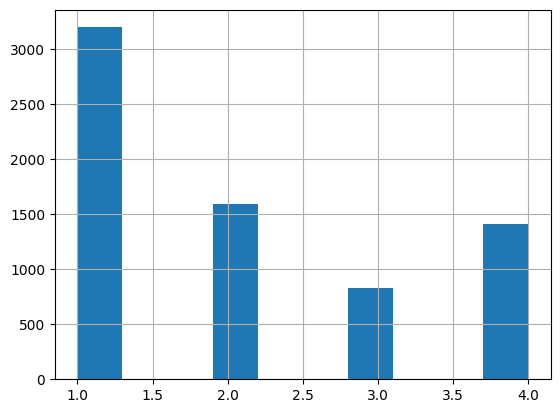

In [348]:
df["tenure_cat"] = pd.cut(df["tenure"], bins = [0,24,48,60,72], labels = [1,2,3,4])
df["tenure_cat"].hist()

In [349]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=20171490)

for train_index, test_index in split.split(df, df["tenure_cat"]):
    X_train = df.loc[train_index].copy()
    X_test = df.loc[test_index].copy()

In [350]:
X_train["tenure_cat"].value_counts()/len(X_train)

1    0.454933
2    0.226667
4    0.200000
3    0.118400
Name: tenure_cat, dtype: float64

In [351]:
X_test["tenure_cat"].value_counts()/len(X_test)

1    0.454869
2    0.226724
4    0.200426
3    0.117982
Name: tenure_cat, dtype: float64

In [352]:
for set_ in (X_train, X_test):
    print(set_)
    set_.drop("tenure_cat",axis = 1, inplace = True)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
2108  8705-WZCYL    Male              0      No         No       1   
873   6347-DCUIK    Male              0      No         No      10   
4369  5578-NKCXI  Female              0     Yes        Yes      58   
5522  7088-FBAWU  Female              0     Yes        Yes      17   
2708  9553-DLCLU  Female              0      No        Yes      13   
...          ...     ...            ...     ...        ...     ...   
1995  2907-ILJBN  Female              0     Yes        Yes      11   
205   2311-QYMUQ  Female              0     Yes        Yes      16   
2254  5174-ITUMV    Male              0     Yes        Yes      67   
3196  7492-TAFJD    Male              0     Yes        Yes       7   
6671  8050-XGRVL  Female              0     Yes        Yes      62   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
2108          Yes                No             DSL                   No  ... 

In [353]:
df = df.drop('tenure_cat', axis = 1)
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PremiumTechSupport,UnlimitedData,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,CustomerStatus,ChurnScore_1,ChurnCategory
0,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Yes,0.0,0,20.94,129.09,1,Churned,86,Competitor


In [354]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'churn_rate', 'ChurnScore', 'CLTV', 'ChurnReason', 'Count', 'Country',
       'State', 'City', 'ZipCode', 'LatLong', 'Latitude', 'Longitude', 'Age',
       'Under30', 'Married', 'ReferredAFriend', 'NumberOfReferrals', 'Offer',
       'AvgMonthlyLongDistanceCharges', 'AvgMonthlyGBDownload',
       'StreamingMusic', 'PremiumTechSupport', 'UnlimitedData', 'TotalRefunds',
       'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue',
       'SatisfactionScore', 'CustomerStatus', 'ChurnScore_1', 'ChurnCategory'],
      dtype='object')

In [355]:
df['Age'].value_counts().reset_index()

,index,Age
0,42,156
1,47,153
2,40,149
3,44,148
4,23,145
...,...,...
57,80,66
58,78,63
59,66,63
60,67,61


In [356]:
# 연령대를 정의
bins = [0, 20, 30, 50, 65, 100]  # 원하는 연령대 구간을 정의합니다.
labels = ['Under 20', '20-30', '30-50', '50-65', 'Over65']  # 각 연령대에 해당하는 라벨을 정의합니다.

# 'Age' 컬럼을 연령대로 나눠 새로운 컬럼 'Age_Group'에 할당
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# 결과 확인
print(df)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     3668-QPYBK    Male              0      No         No       2   
1     9237-HQITU  Female              0      No         No       2   
2     9305-CDSKC  Female              0      No         No       8   
3     7892-POOKP  Female              0     Yes         No      28   
4     0280-XJGEX    Male              0      No         No      49   
...          ...     ...            ...     ...        ...     ...   
7027  2569-WGERO  Female              0      No         No      72   
7028  6840-RESVB    Male              0     Yes        Yes      24   
7029  2234-XADUH  Female              0     Yes        Yes      72   
7030  4801-JZAZL  Female              0     Yes        Yes      11   
7031  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
0             Yes                No             DSL                  Yes  ... 

In [357]:
df.groupby('Age_Group')['TotalCharges'].count()

Age_Group
Under 20     127
20-30       1270
30-50       2604
50-65       1889
Over65      1142
Name: TotalCharges, dtype: int64

In [358]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [359]:
df.groupby('Age_Group')['TotalCharges'].mean()

Age_Group
Under 20    2062.254724
20-30       2237.262205
30-50       2176.610676
50-65       2157.487507
Over65      2810.465193
Name: TotalCharges, dtype: float64

In [360]:
df.groupby('Age_Group')['TotalCharges'].median()

Age_Group
Under 20    1346.20
20-30       1345.95
30-50       1231.75
50-65       1336.80
Over65      2263.75
Name: TotalCharges, dtype: float64

In [361]:
df.groupby(['SeniorCitizen'])['TotalCharges'].mean()

SeniorCitizen
0    2181.089550
1    2810.465193
Name: TotalCharges, dtype: float64

In [362]:
df.groupby(['SeniorCitizen'])['TotalCharges'].median()

SeniorCitizen
0    1295.775
1    2263.750
Name: TotalCharges, dtype: float64

In [363]:
df = df.drop('Age_Group', axis = 1)

- 삭제이유:
    + customerID: 불필요한 컬럼이라 삭제
    + Partner: Married와 동일하여 삭제
    + Churn: 수치형인 churn_rate와 동일하여 삭제, 삭제후 churn_rate을 Churn으로 컬럼명 변경
    + Country, State: 모두 동일한 미국의 캘리포니아를 지목하여 삭제
    + City: 유일값이 1000개가 넘어가 현재 달리 처리할 방법이 생각나지 않아 삭제
    + Lat Long: 위도, 경도 개별 데이터가 있어 삭제
    + Churn reason: Churn Category로 대체하여 나타낼 수 있다고 생각하여 삭제

In [364]:
df = df.drop(['customerID', 'Partner', 'Churn', 'Country', 'State', 'City', 'LatLong', 'CustomerStatus', 'ChurnReason'], axis = 1)
df = df.rename(columns = {'churn_rate': 'Churn'})

In [365]:
df.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMusic,PremiumTechSupport,UnlimitedData,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,ChurnScore_1,ChurnCategory
0,Male,0,No,2,Yes,No,DSL,Yes,Yes,No,...,No,No,Yes,0.0,0,20.94,129.09,1,86,Competitor
1,Female,0,No,2,Yes,No,Fiber optic,No,No,No,...,No,No,Yes,0.0,0,18.24,169.89,2,67,Other
2,Female,0,No,8,Yes,Yes,Fiber optic,No,No,Yes,...,Yes,No,Yes,0.0,0,97.20,917.70,3,86,Other
3,Female,0,No,28,Yes,Yes,Fiber optic,No,No,Yes,...,Yes,Yes,Yes,0.0,0,136.92,3182.97,3,84,Other
4,Male,0,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,...,Yes,No,Yes,0.0,0,2172.17,7208.47,1,89,Competitor


In [366]:
# No internet service -> No로 통일
df.loc[df['InternetService']=='No', ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']] = 'No'

# DSL, Fiber optic -> Yes로 통일
df['InternetService'] = df['InternetService'].replace(['DSL', 'Fiber optic'], 'Yes')

# No phone service -> No로 통일
df.loc[df['PhoneService']=='No', 'MultipleLines'] = 'No'

In [367]:
df.iloc[:, 0:20].head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnScore
0,Male,0,No,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86
1,Female,0,No,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67
2,Female,0,No,8,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86
3,Female,0,No,28,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84
4,Male,0,No,49,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89


In [368]:
df.iloc[:, 20:40].head()

,CLTV,Count,ZipCode,Latitude,Longitude,Age,Under30,Married,ReferredAFriend,NumberOfReferrals,Offer,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,StreamingMusic,PremiumTechSupport,UnlimitedData,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue
0,3239,1,90003,33.964131,-118.272783,37,No,No,No,0,None,10.47,21,No,No,Yes,0.0,0,20.94,129.09
1,2701,1,90005,34.059281,-118.307420,19,Yes,No,No,0,None,9.12,51,No,No,Yes,0.0,0,18.24,169.89
2,5372,1,90006,34.048013,-118.293953,31,No,No,No,0,None,12.15,26,Yes,No,Yes,0.0,0,97.20,917.70
3,5003,1,90010,34.062125,-118.315709,23,Yes,Yes,No,0,Offer C,4.89,47,Yes,Yes,Yes,0.0,0,136.92,3182.97
4,5340,1,90015,34.039224,-118.266293,38,No,No,No,0,None,44.33,11,Yes,No,Yes,0.0,0,2172.17,7208.47


In [369]:
df.iloc[:, 40:].head()

,SatisfactionScore,ChurnScore_1,ChurnCategory
0,1,86,Competitor
1,2,67,Other
2,3,86,Other
3,3,84,Other
4,1,89,Competitor


In [370]:
from scipy import stats

num_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'ChurnScore', 'CLTV', 'Age', 'NumberOfReferrals', 'AvgMonthlyLongDistanceCharges', 'AvgMonthlyGBDownload',
                    'TotalRefunds', 'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue', 'SatisfactionScore', 'ChurnScore_1']

# Point Biserial Correlation table
pb_list = []
print("Significant Point Biserial Correlations")
print("{0:23} |   {1:4}|  {2:}".format("Factor", "r", "p"))
for i in num_features:
    r, p = stats.pointbiserialr(df['Churn'], df[i])
    if p < .01:
        print("{0:23} | {1:5.2f} | {2:.2f}".format(i, r, p))
        pb_list.append(i)

Significant Point Biserial Correlations
Factor                  |   r   |  p
tenure                  | -0.35 | 0.00
MonthlyCharges          |  0.19 | 0.00
TotalCharges            | -0.20 | 0.00
ChurnScore              |  0.66 | 0.00
CLTV                    | -0.13 | 0.00
Age                     |  0.12 | 0.00
NumberOfReferrals       | -0.29 | 0.00
AvgMonthlyGBDownload    |  0.05 | 0.00
TotalRefunds            | -0.03 | 0.00
TotalLongDistanceCharges | -0.22 | 0.00
TotalRevenue            | -0.22 | 0.00
SatisfactionScore       | -0.75 | 0.00
ChurnScore_1            |  0.66 | 0.00


<Axes: >

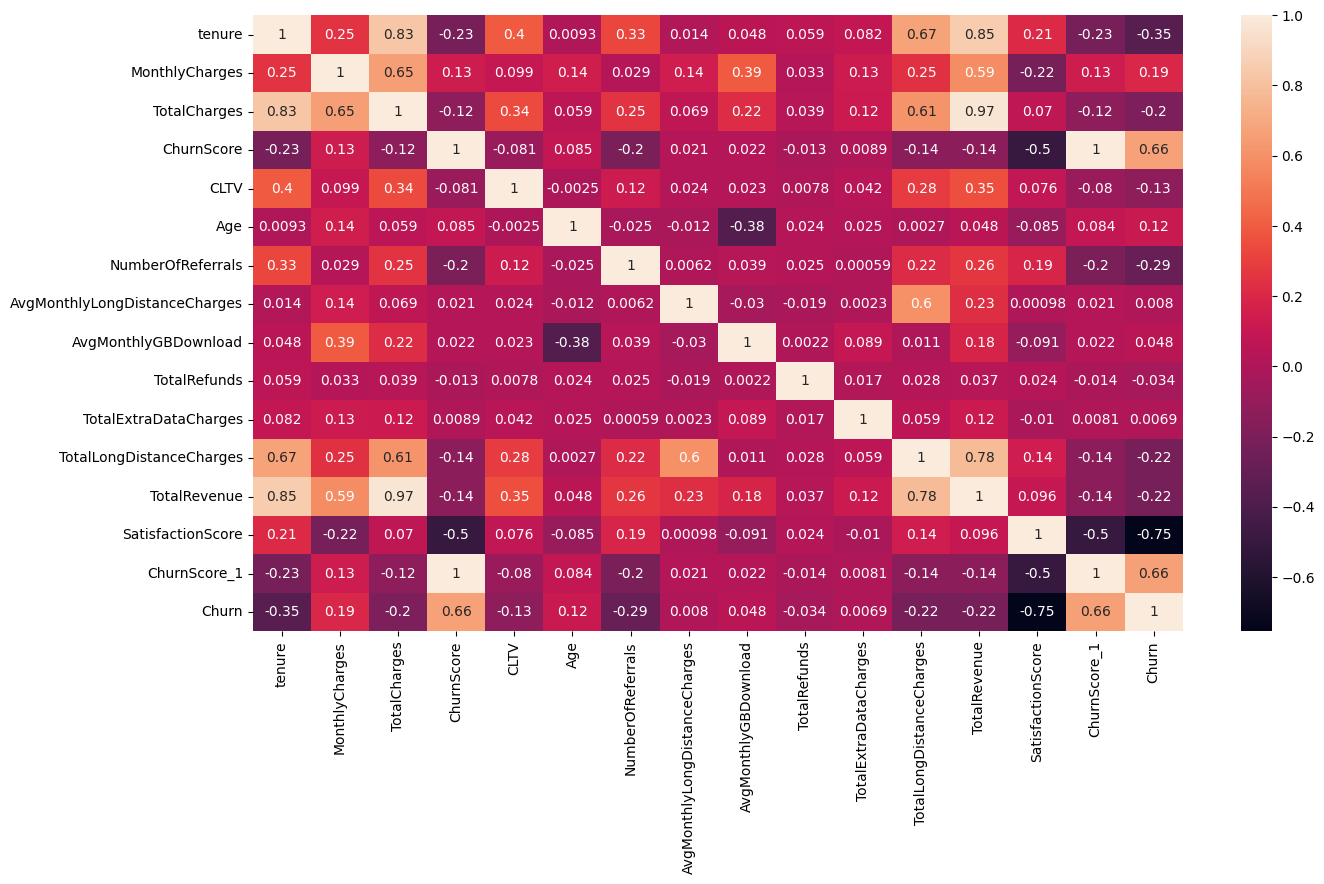

In [371]:
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'ChurnScore', 'CLTV', 'Age', 'NumberOfReferrals', 'AvgMonthlyLongDistanceCharges', 'AvgMonthlyGBDownload',
                    'TotalRefunds', 'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue', 'SatisfactionScore', 'ChurnScore_1', 'Churn']
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
sns.heatmap(df[num_features].corr(), annot = True)

In [372]:
from statsmodels.formula.api import ols
y = df['Churn']

model = ols('y ~ tenure + MonthlyCharges + TotalCharges + TotalRefunds + TotalExtraDataCharges + TotalLongDistanceCharges + ChurnScore + CLTV + Age + NumberOfReferrals + AvgMonthlyLongDistanceCharges + AvgMonthlyGBDownload + SatisfactionScore', df)


res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     1367.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:37:50   Log-Likelihood:                 204.62
No. Observations:                7032   AIC:                            -381.2
Df Residuals:                    7018   BIC:                            -285.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.4249      0.024     17.758      0.000       0.378       0.472
tenure                           -0.0013      0.000     -3.975      0.000      -0.002      -0.001
MonthlyCharges                    0.0024      0.000     12.746      0.000       0.002       0.003
TotalCharges                   -3.34e-05    3.9e-06     -8.574      0.000    -4.1e-05   -2.58e-05
TotalRefunds                     -0.0007      0.000     -1.857      0.063      -0.001    3.67e-05
TotalExtraDataCharges          6.655e-05      0.000      0.589      0.556      -0.000       0.000
TotalLongDistanceCharges       1.766e-05   7.53e-06      2.345      0.019     2.9e-06    3.24e-05
ChurnScore                        0.0070      0.000     45.633      0.000       0.007       0.007
CLTV                            3.05e-06   2.59e-06      1.178      0.239   -2.02e-06    8.12e-06
Age                               0.0006      0.000      2.911      0.004       0.000       0.001
NumberOfReferrals                -0.0097      0.001     -9.618      0.000      -0.012      -0.008
AvgMonthlyLongDistanceCharges    -0.0008      0.000     -2.713      0.007      -0.001      -0.000
AvgMonthlyGBDownload             -0.0004      0.000     -2.370      0.018      -0.001   -7.05e-05
SatisfactionScore                -0.1890      0.003    -67.537      0.000      -0.195      -0.184
==============================================================================
Omnibus:                       55.905   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.678
Skew:                           0.135   Prob(JB):                     7.31e-11
Kurtosis:                       2.706   Cond. No.                     4.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [373]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)}
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않음.

,컬럼,VIF
0,tenure,7.588699
1,MonthlyCharges,4.014293
2,TotalCharges,9.903393
3,TotalRefunds,1.008929
4,TotalExtraDataCharges,1.023598
5,TotalLongDistanceCharges,5.169012
6,ChurnScore,1.384701
7,CLTV,1.190213
8,Age,1.345588
9,NumberOfReferrals,1.152829


In [374]:
# Yes, No 문자열 데이터 -> 1과 0로 수정
target_cols = ['Dependents', 'PhoneService', 'MultipleLines',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
                'Under30', 'Married', 'ReferredAFriend','StreamingMusic',
                'PremiumTechSupport', 'UnlimitedData', 'InternetService']

for idx, row in df.iterrows():
    for col in target_cols:
        if (row[col] == 'Yes'):
            df.loc[idx, col] = 1
        elif (row[col] == 'No'):
            df.loc[idx, col] = 0

df[target_cols] = df[target_cols].astype('int64')

# Month-to-month:1, One year:12, Two year:24 로 변경
df.loc[df["Contract"]=='Month-to-month', "Contract"] = 1
df.loc[df["Contract"]=='One year', "Contract"] = 12
df.loc[df["Contract"]=='Two year', "Contract"] = 24

df["Contract"] = df["Contract"].astype('int64')


df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

df.head(2)

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMusic,PremiumTechSupport,UnlimitedData,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,ChurnScore_1,ChurnCategory
0,1,0,0,2,1,0,1,1,1,0,...,0,0,1,0.0,0,20.94,129.09,1,86,Competitor
1,0,0,0,2,1,0,1,0,0,0,...,0,0,1,0.0,0,18.24,169.89,2,67,Other


In [375]:
df['ChurnCategory'].value_counts()

0                  5163
Competitor          841
Attitude            314
Dissatisfaction     303
Price               211
Other               200
Name: ChurnCategory, dtype: int64

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         7032 non-null   int64  
 1   SeniorCitizen                  7032 non-null   int64  
 2   Dependents                     7032 non-null   int64  
 3   tenure                         7032 non-null   int64  
 4   PhoneService                   7032 non-null   int64  
 5   MultipleLines                  7032 non-null   int64  
 6   InternetService                7032 non-null   int64  
 7   OnlineSecurity                 7032 non-null   int64  
 8   OnlineBackup                   7032 non-null   int64  
 9   DeviceProtection               7032 non-null   int64  
 10  TechSupport                    7032 non-null   int64  
 11  StreamingTV                    7032 non-null   int64  
 12  StreamingMovies                7032 non-null   i

In [377]:
df = df.drop(['ChurnScore', 'ChurnScore_1', 'TotalRevenue'], axis = 1)

#### 더미 변수 생성

In [378]:
df = pd.get_dummies(df, columns = ['Contract', 'PaymentMethod', 'Offer', 'ChurnCategory'])
df.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,ChurnCategory_0,ChurnCategory_Attitude,ChurnCategory_Competitor,ChurnCategory_Dissatisfaction,ChurnCategory_Other,ChurnCategory_Price
0,1,0,0,2,1,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,8,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,28,1,1,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,1,0,0,49,1,1,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0


In [379]:
df.to_excel('/content/drive/MyDrive/Mulcamp_final/data/Telco_customer_churn(preprocessed).xlsx', index = False)

### 머신러닝 준비

In [380]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [381]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [383]:
# 수치형 변수
numeric_features = X_train[['tenure', 'Age', 'NumberOfReferrals', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyLongDistanceCharges', 'AvgMonthlyGBDownload', 'TotalRefunds', 'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'CLTV', 'SatisfactionScore']]

In [384]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.3, random_state = 100)

In [385]:
from sklearn.preprocessing import StandardScaler
# 수치형 변수 표준화, dataframe 생성
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_features)
numeric_scaled

array([[-1.27878188,  1.40197447, -0.65377914, ..., -0.82467131,
         0.23759982, -1.02609683],
       [-0.30320276, -0.33000188, -0.65377914, ..., -0.6723968 ,
        -1.93058469, -0.19907367],
       [-0.05930798,  0.56584795, -0.65377914, ...,  0.78171381,
        -0.38636871, -0.19907367],
       ...,
       [ 1.60730634,  0.86446456, -0.32306802, ...,  1.54647546,
         1.77162856, -0.19907367],
       [ 1.52600808, -0.62861849, -0.65377914, ...,  1.29986787,
         0.85732366,  0.6279495 ],
       [ 0.99756939, -0.62861849,  0.66906534, ...,  1.23574429,
         1.00334078,  0.6279495 ]])

In [386]:
y_train.value_counts()

0    2906
1    1031
Name: Churn, dtype: int64

In [387]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression(random_state=0, solver='liblinear')
params = {"C" : [0.01, 0.1, 1, 5, 10]}

grid_cv = GridSearchCV(lr_clf, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)

train_pred = grid_cv.predict(X_train)
pred = grid_cv.predict(X_test)

from sklearn.metrics import accuracy_score  # 정확도 라이브러리 호출
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, pred))

{'C': 1}
0.9872999745999492
0.9850746268656716


In [388]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, pred.shape)

(3937, 54) (1407, 54) (3937,) (1407,) (1407,)


In [389]:
# # 데이터 불균형으로 oversampling
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=0)
# X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# X_train_over.shape, y_train_over.shape

#### 여기까지

In [390]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def Modeling_result(train_x, train_y, valid_x, valid_y):

    models = [LogisticRegression(solver='liblinear'), RandomForestClassifier(), AdaBoostClassifier(),
              XGBClassifier(), SVC(kernel='linear', C=1.0), DecisionTreeClassifier()]
    names = ["Logistic","RF","Ada","XGB", "SVM", "DT"]

    train_acc = []
    train_precision = []
    train_recall = []
    train_roc = []

    valid_acc = []
    valid_precision = []
    valid_recall = []
    valid_roc = []


    for model, name in zip(models, names):

        model.fit(train_x,train_y)
        model.predict(valid_x)

        train_acc.append(accuracy_score(train_y,model.predict(train_x)))
        train_precision.append(precision_score(train_y,model.predict(train_x)))
        train_recall.append(recall_score(train_y,model.predict(train_x)))
        train_roc.append(roc_auc_score(train_y, model.predict(train_x)))

        valid_acc.append(accuracy_score(valid_y, model.predict(valid_x)))
        valid_precision.append(precision_score(valid_y,model.predict(valid_x)))
        valid_recall.append(recall_score(valid_y,model.predict(valid_x)))
        valid_roc.append(roc_auc_score(valid_y, model.predict(valid_x)))

    return pd.DataFrame({"Model":names, "Train_Accuracy":train_acc, "Train_Precision":train_precision, "Train_Recall":train_recall, "Train_AUC":train_roc,
             "Valid_Accuracy":valid_acc, "Valid_Precision":valid_precision, "Valid_Recall":valid_recall, "Valid_AUC":valid_roc})

In [391]:
gender_right = Modeling_result(X_train, y_train, X_valid, y_valid)
gender_right

,Model,Train_Accuracy,Train_Precision,Train_Recall,Train_AUC,Valid_Accuracy,Valid_Precision,Valid_Recall,Valid_AUC
0,Logistic,0.987300,0.998983,0.952473,0.976065,0.985190,1.000000,0.946467,0.973233
1,RF,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Ada,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,XGB,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,SVM,0.839472,0.779804,0.539282,0.742628,0.844194,0.824841,0.554604,0.754779
5,DT,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
